In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [2]:
maps_api_data = pd.read_csv('Maps_info.csv', encoding = 'utf-8')
keep = ['pictureid','Closest Beach','Closest Fancy Restaurant']
drop_columns = []
for i in maps_api_data.columns:
    if i not in keep:
        drop_columns.append(i)
maps_distances = maps_api_data.drop(columns = drop_columns)
maps_distances.head()

,pictureid,Closest Beach,Closest Fancy Restaurant
0,10,0.6,0.4
1,47,23.9,0.9
2,55,16.1,1.3
3,79,5.5,0.8
4,93,27.8,5.5


In [3]:
train_dataset = pd.read_csv('train_subset.csv', encoding = 'utf-8')
test_dataset = pd.read_csv('test_subset.csv', encoding = 'utf-8')
#holdout_dataset = pd.read_csv('holdout_subset.csv', encoding = 'utf-8')

df_train = train_dataset.join(maps_distances.set_index('pictureid'), on='pictureid', how='inner')
df_test = test_dataset.join(maps_distances.set_index('pictureid'), on='pictureid', how='inner')
#df_test= holdout_dataset.join(maps_distances.set_index('pictureid'), on='pictureid', how='inner')

In [4]:
year_built = list(df_train['yearbuilt'])
normalized_year = []
for i in year_built:
    normalized_year.append((i - 1900)/10)

keep = ['bedroomcnt','calculatedbathnbr','calculatedfinishedsquarefeet','garagecarcnt', 'Closest Beach', 'Closest Fancy Restaurant', 'taxvaluedollarcnt']

drop_columns = []
for i in df_train.columns:
    if i not in keep:
        drop_columns.append(i)
                           
X_values = df_train.drop(columns = drop_columns)
X_values['yearbuilt'] = normalized_year
X_values['calculatedfinishedsquarefeet'] = X_values['calculatedfinishedsquarefeet']/100
X_values['taxvaluedollarcnt'] = round(X_values['taxvaluedollarcnt']/10000,2)
X_values.head()


,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,garagecarcnt,taxvaluedollarcnt,Closest Beach,Closest Fancy Restaurant,yearbuilt
0,3,2.0,10.59,2.0,32.98,0.6,0.4,6.2
1,3,3.0,16.80,2.0,27.93,23.9,0.9,8.6
2,3,3.0,27.70,2.0,36.36,16.1,1.3,8.0
3,3,2.0,14.16,2.0,5.95,5.5,0.8,6.8
4,5,3.0,26.96,2.0,85.44,27.8,5.5,9.4


In [5]:
year_built_test = list(df_test['yearbuilt'])
normalized_year_test = []
for i in year_built_test:
    normalized_year_test.append((i - 1900)/10)
    
keep_test = ['bedroomcnt','calculatedbathnbr','calculatedfinishedsquarefeet','garagecarcnt','Closest Beach', 'Closest Fancy Restaurant', 'taxvaluedollarcnt']
drop_columns_test = []
for i in df_test.columns:
    if i not in keep_test:
        drop_columns_test.append(i)
X_test = df_test.drop(columns = drop_columns_test)
X_test['yearbuilt'] = normalized_year_test
X_test['calculatedfinishedsquarefeet'] = X_test['calculatedfinishedsquarefeet']/100
X_test['taxvaluedollarcnt'] = round(X_test['taxvaluedollarcnt']/10000,2)
X_test.head()


,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,garagecarcnt,taxvaluedollarcnt,Closest Beach,Closest Fancy Restaurant,yearbuilt
0,3,3.0,12.99,2.0,29.58,26.3,20.0,8.9
1,4,3.0,21.46,2.0,42.15,6.8,1.9,6.8
2,5,4.0,39.07,2.0,223.25,11.0,5.6,10.6
3,4,2.5,24.74,2.0,41.06,3.4,4.6,8.1
4,3,3.0,25.78,2.0,70.85,9.9,1.3,8.4


In [6]:
area = X_values['calculatedfinishedsquarefeet']
year = X_values['yearbuilt']
beach = X_values['Closest Beach']
restaurant = X_values['Closest Fancy Restaurant']
y_values = X_values['taxvaluedollarcnt']

-1.5337499999999995
40.41625


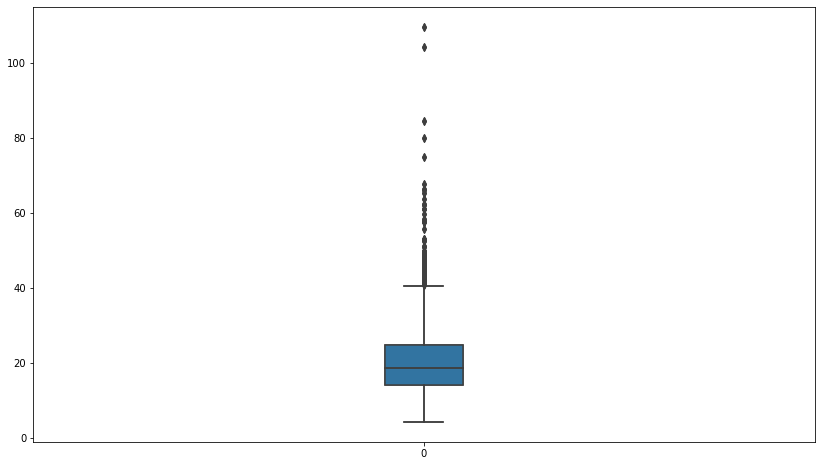

In [7]:
quartiles = pd.DataFrame(area).quantile([0.25, 0.5, 0.75, 1])

fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(14, 8)

# Boxplot of Normal distribution
plot1 = sns.boxplot(area)
plot1.set(xlim=(-4, 4))

fig.set_size_inches(14, 8)
# Boxplot of Normal distribution
plot1 = sns.boxplot(area)
plot1.set(xlim=(-4, 4))

q1 = pd.DataFrame(area).quantile(0.25)[0]
q3 = pd.DataFrame(area).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range
fence_low_area = q1 - (1.5*iqr)
fence_high_area = q3 + (1.5*iqr)

print(fence_low_area)
print(fence_high_area)

-24.137499999999996
55.96249999999999


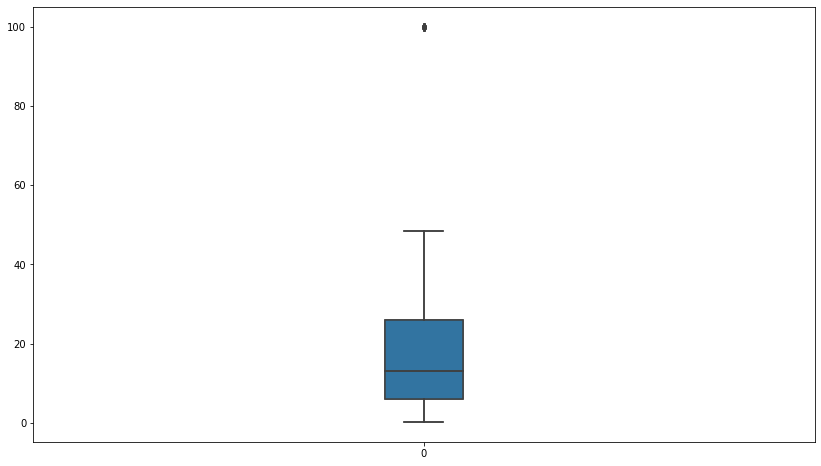

In [8]:
quartiles = pd.DataFrame(beach).quantile([0.25, 0.5, 0.75, 1])

fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(14, 8)

# Boxplot of Normal distribution
plot1 = sns.boxplot(beach)
plot1.set(xlim=(-4, 4))

fig.set_size_inches(14, 8)
# Boxplot of Normal distribution
plot1 = sns.boxplot(beach)
plot1.set(xlim=(-4, 4))

q1 = pd.DataFrame(beach).quantile(0.25)[0]
q3 = pd.DataFrame(beach).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range
fence_low_beach = q1 - (1.5*iqr)
fence_high_beach = q3 + (1.5*iqr)

print(fence_low_beach)
print(fence_high_beach)

-35.543749999999996
126.92625


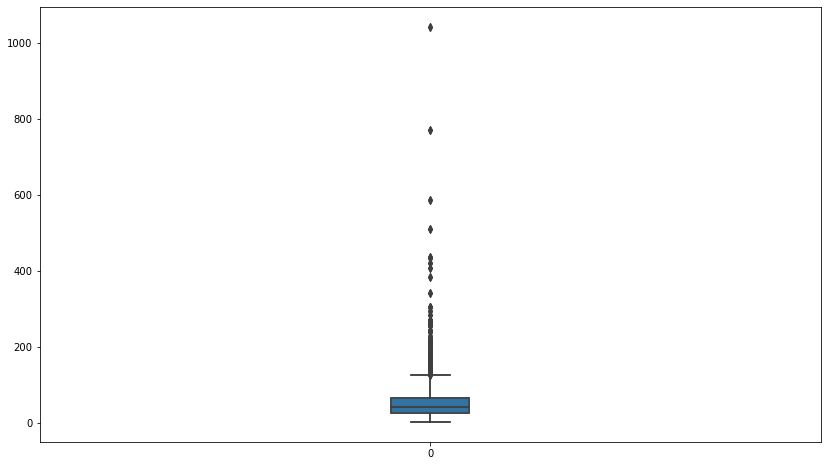

In [9]:
quartiles = pd.DataFrame(y_values).quantile([0.25, 0.5, 0.75, 1])

fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(14, 8)

# Boxplot of Normal distribution
plot1 = sns.boxplot(y_values)
plot1.set(xlim=(-4, 4))

fig.set_size_inches(14, 8)
# Boxplot of Normal distribution
plot1 = sns.boxplot(y_values)
plot1.set(xlim=(-4, 4))

q1 = pd.DataFrame(y_values).quantile(0.25)[0]
q3 = pd.DataFrame(y_values).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range
fence_low_y = q1 - (1.5*iqr)
fence_high_y = q3 + (1.5*iqr)

print(fence_low_y)
print(fence_high_y)

In [10]:
print('Before',len(X_values))

X_values = X_values[X_values['calculatedfinishedsquarefeet'] < fence_high_area]
X_values = X_values[X_values['Closest Beach'] < fence_high_beach]
X_values = X_values[X_values['taxvaluedollarcnt'] < fence_high_y]
X_values.dropna(0, inplace = True)

print('After',len(X_values))

Before 2000
After 1798


C:\Users\RTiwari1\AppData\Local\Temp\ipykernel_20036\4161043478.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  X_values.dropna(0, inplace = True)


In [11]:
print('Before',len(X_test))

X_test = X_test[X_test['calculatedfinishedsquarefeet'] < fence_high_area]
X_test = X_test[X_test['Closest Beach'] < fence_high_beach]
X_test = X_test[X_test['taxvaluedollarcnt'] < fence_high_y]
X_test.dropna(0, inplace = True)
print('After',len(X_test))

Before 500
After 464


C:\Users\RTiwari1\AppData\Local\Temp\ipykernel_20036\4207642555.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  X_test.dropna(0, inplace = True)


In [24]:
Y_values = list(X_values['taxvaluedollarcnt'])
Y_test = list(X_test['taxvaluedollarcnt'])
X_values = X_values.drop(columns = ['taxvaluedollarcnt'])
X_test = X_test.drop(columns = ['taxvaluedollarcnt'])
X_values.head()

,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,garagecarcnt,Closest Beach,Closest Fancy Restaurant,yearbuilt
0,3,2.0,10.59,2.0,0.6,0.4,6.2
1,3,3.0,16.80,2.0,23.9,0.9,8.6
2,3,3.0,27.70,2.0,16.1,1.3,8.0
3,3,2.0,14.16,2.0,5.5,0.8,6.8
4,5,3.0,26.96,2.0,27.8,5.5,9.4


In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

model = XGBRegressor(n_estimators=150, learning_rate=0.05, random_state=0)

model.fit(X_values, Y_values)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [27]:
from sklearn.metrics import mean_squared_error

predictions_xg = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
print(mse)

452.2722758898843


In [28]:
testing = pd.DataFrame()
testing['tax dollar count'] = Y_test
testing['XGBoost predictions'] = predictions_xg
testing

,tax dollar count,XGBoost predictions
0,29.58,31.701229
1,42.15,34.943523
2,41.06,49.933781
3,70.85,59.159618
4,41.72,52.416763
...,...,...
459,32.88,24.764915
460,65.08,39.779263
461,30.51,27.168392
462,69.35,50.049664


In [12]:
import h2o
from h2o.automl import H2OAutoML

In [13]:
h2o.init()
aml = H2OAutoML(max_models =25, balance_classes=True, seed =1)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.341-b10, mixed mode)
  Starting server from C:\Users\RTiwari1\Anaconda3\envs\tf-gpu\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\RTiwari1\AppData\Local\Temp\tmpdq1dy267
  JVM stdout: C:\Users\RTiwari1\AppData\Local\Temp\tmpdq1dy267\h2o_RTiwari1_started_from_python.out
  JVM stderr: C:\Users\RTiwari1\AppData\Local\Temp\tmpdq1dy267\h2o_RTiwari1_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_RTiwari1_7y9wvp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.408 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [14]:
train_frame = h2o.H2OFrame(X_values)
test_frame = h2o.H2OFrame(X_test)

x = train_frame.columns
y = 'taxvaluedollarcnt'
x.remove(y)

print(x)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
['bedroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'Closest Beach', 'Closest Fancy Restaurant', 'yearbuilt']


In [15]:
aml.train(x = x, y = y, training_frame = train_frame)

AutoML progress: |
09:05:51.147: AutoML: XGBoost is not available; skipping it.

████████████
09:05:57.670: DeepLearning_1_AutoML_1_20221013_90551 [DeepLearning def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for DeepLearning model: DeepLearning_1_AutoML_1_20221013_90551_cv_1.  Details: ERRR on field: _balance_classes: balance_classes requires classification.


███████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,16.430332,0.7646224,16.77162,15.609548,17.39216,16.692654,15.685685
mean_residual_deviance,416.52222,33.453053,443.0126,376.10037,429.46875,448.4206,385.60876
mse,416.52222,33.453053,443.0126,376.10037,429.46875,448.4206,385.60876
null_deviance,248728.02,11457.464,251525.94,248596.95,254644.83,259359.31,229513.05
r2,0.3955339,0.0347273,0.359976,0.4532764,0.3851794,0.3847096,0.3945282
residual_deviance,149800.47,12413.286,160813.58,135396.14,156326.62,159189.31,137276.72
rmse,20.395533,0.8249497,21.047865,19.393307,20.723627,21.175943,19.636923
rmsle,0.6163118,0.0381599,0.6184125,0.562356,0.6645127,0.6011236,0.6351545


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20221013_90551_model_20,8.1835,66.9697,6.37071,0.33241,66.9697,175,0.006915,GBM
GBM_grid_1_AutoML_1_20221013_90551_model_15,8.63689,74.5959,6.76407,0.354963,74.5959,143,0.007102,GBM
DRF_1_AutoML_1_20221013_90551,8.74729,76.515,6.89198,0.333197,76.515,363,0.010131,DRF
GBM_grid_1_AutoML_1_20221013_90551_model_28,9.34737,87.3732,7.50217,0.380513,87.3732,120,0.00648,GBM
XRT_1_AutoML_1_20221013_90551,9.73857,94.8398,7.72542,0.357396,94.8398,481,0.010186,DRF
GBM_grid_1_AutoML_1_20221013_90551_model_25,14.0028,196.079,11.1314,0.486768,196.079,99,0.005521,GBM
GBM_grid_1_AutoML_1_20221013_90551_model_22,14.717,216.59,11.6604,0.498562,216.59,109,0.007861,GBM
GBM_4_AutoML_1_20221013_90551,15.3763,236.43,12.2779,0.515763,236.43,109,0.004445,GBM
GBM_grid_1_AutoML_1_20221013_90551_model_19,15.5426,241.573,12.4887,0.53303,241.573,66,0.003875,GBM
GBM_grid_1_AutoML_1_20221013_90551_model_5,15.774,248.82,12.5465,0.515006,248.82,120,0.004393,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

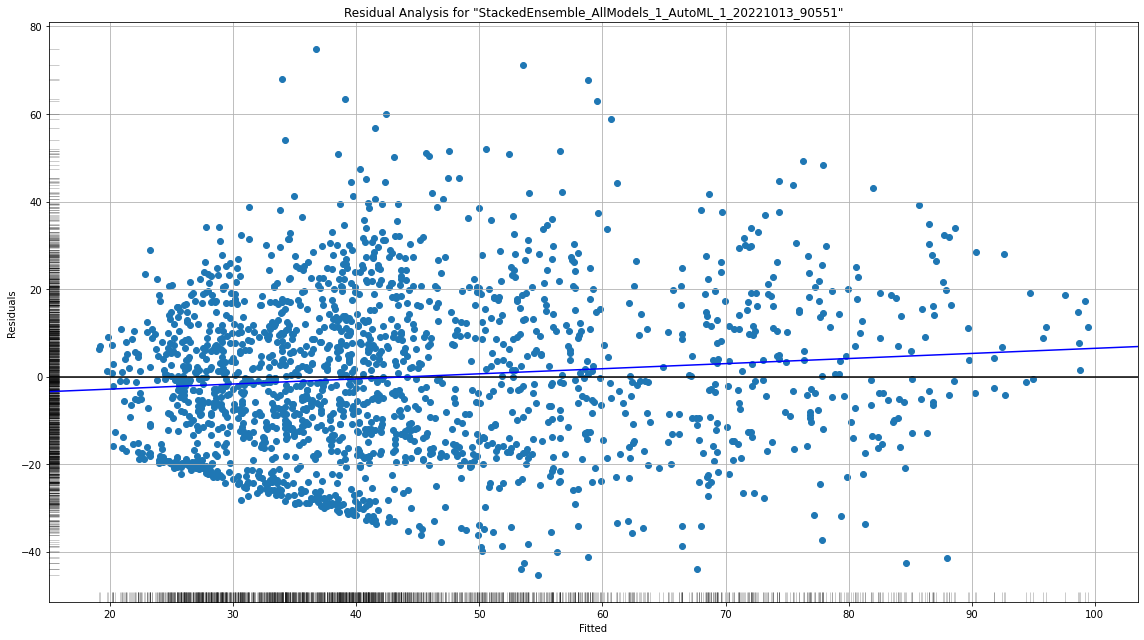

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

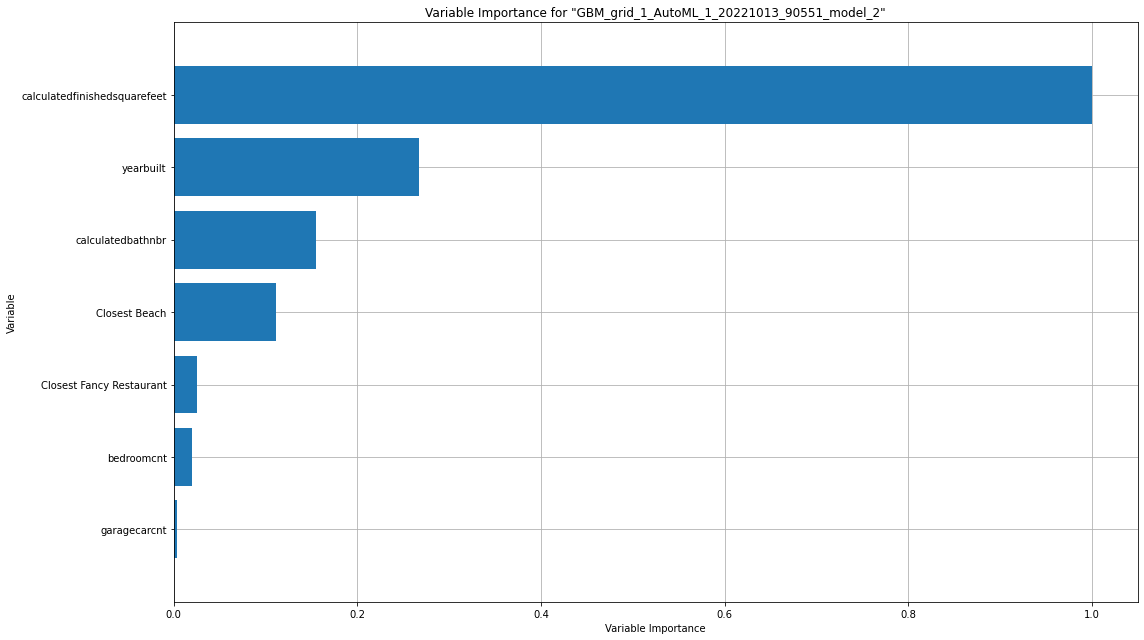

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

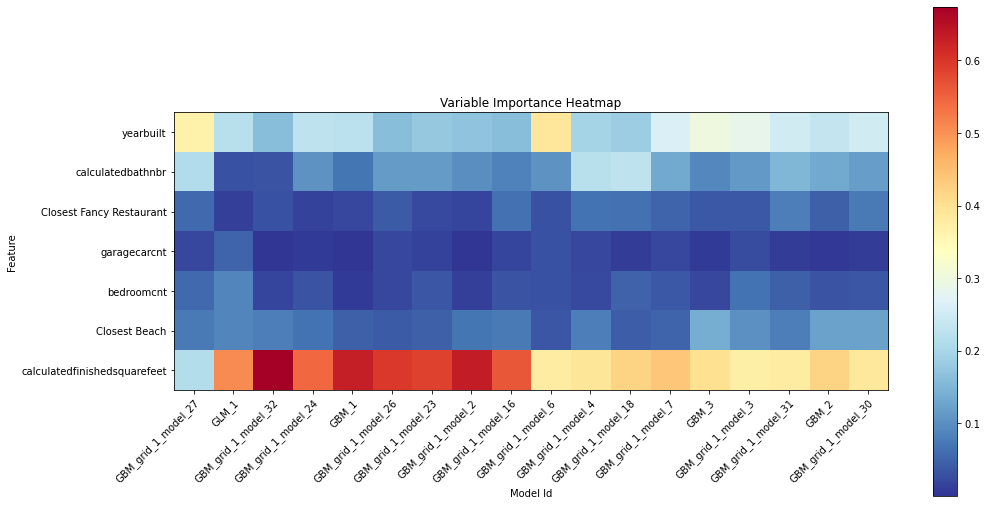

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

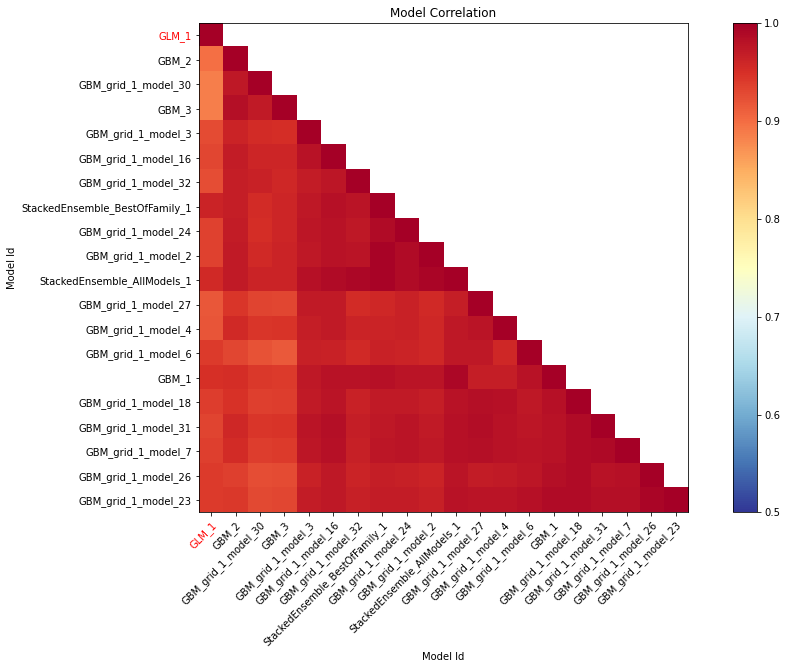

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

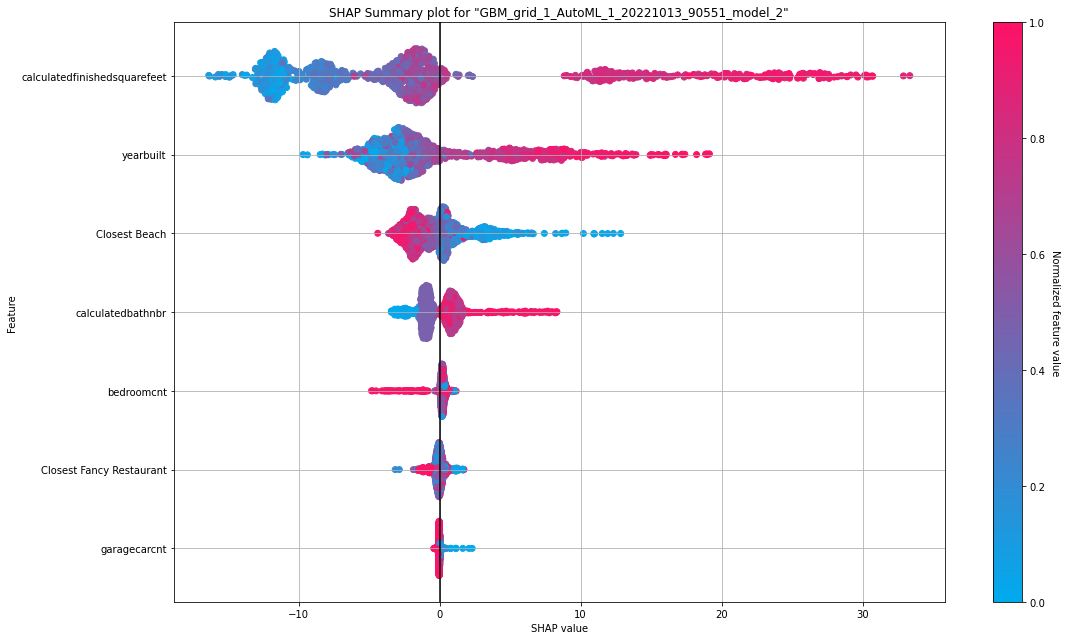

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

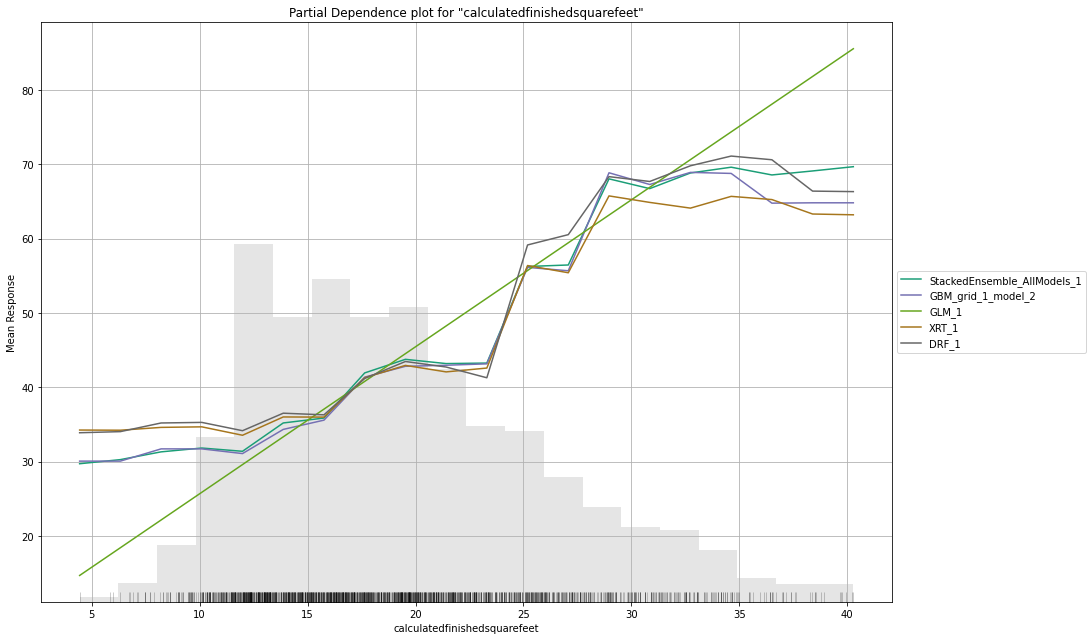

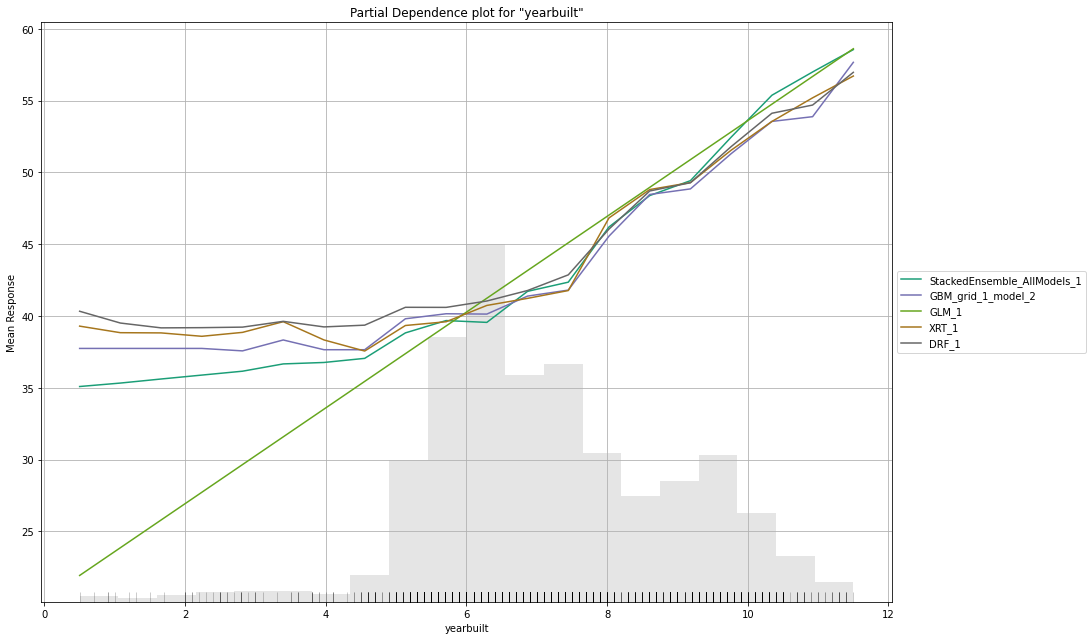

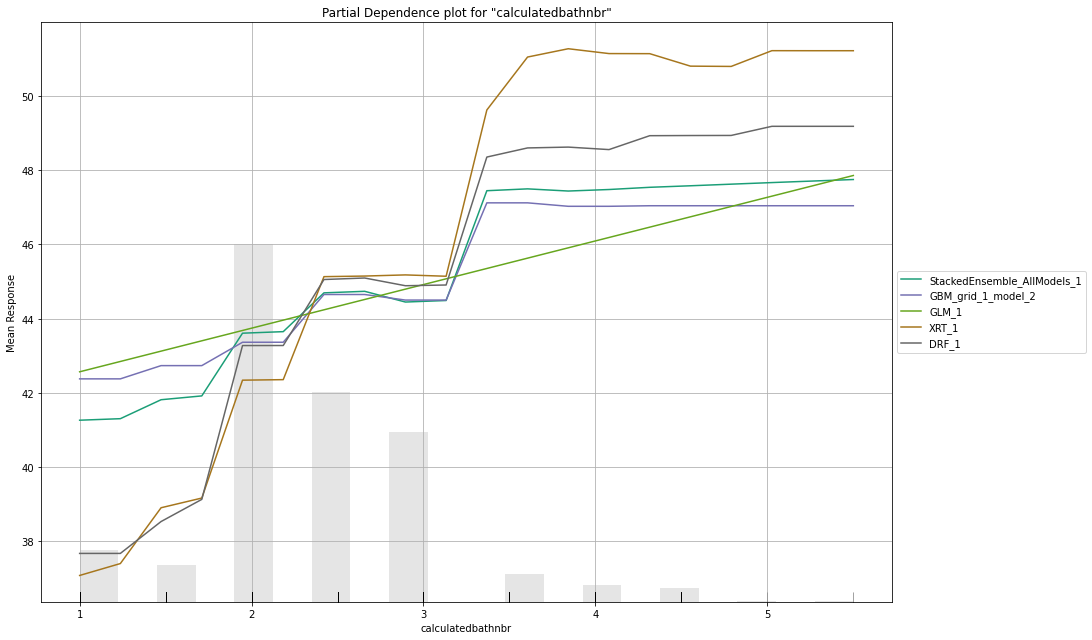

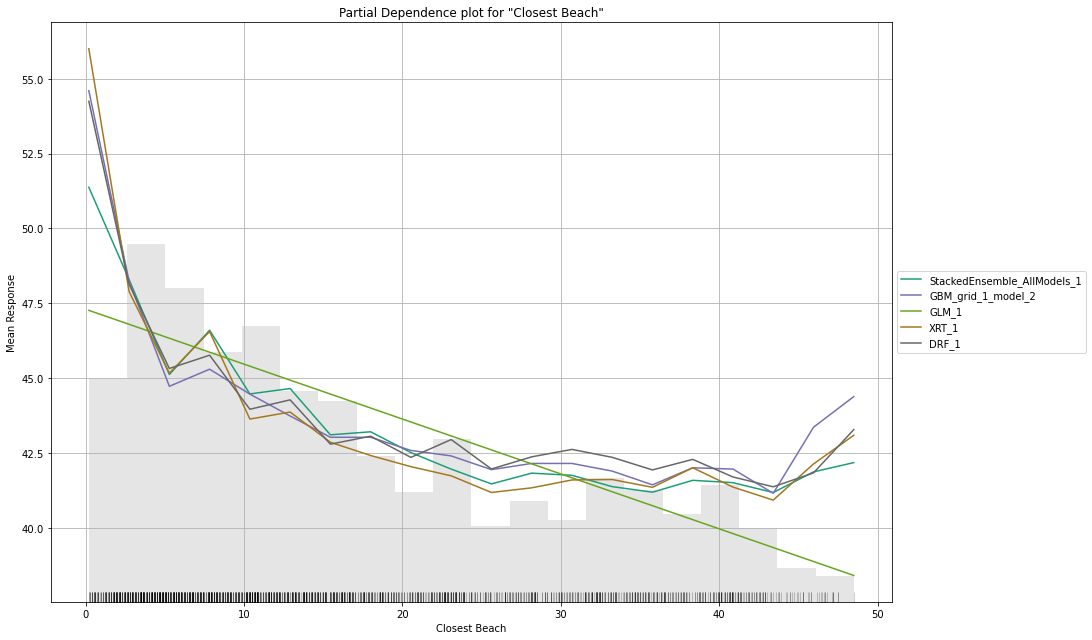

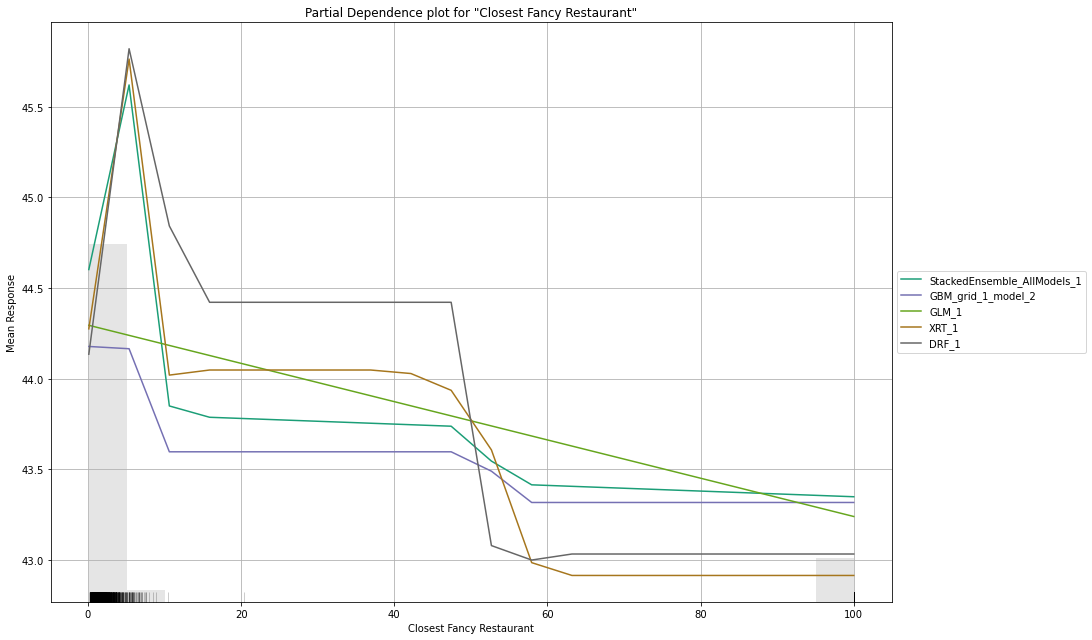

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

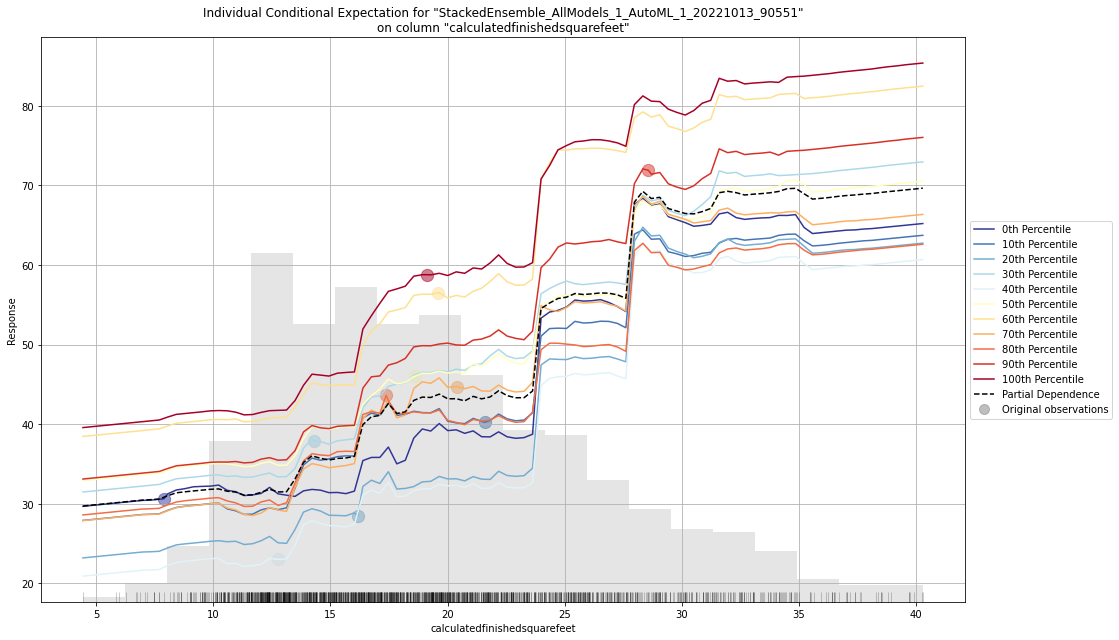

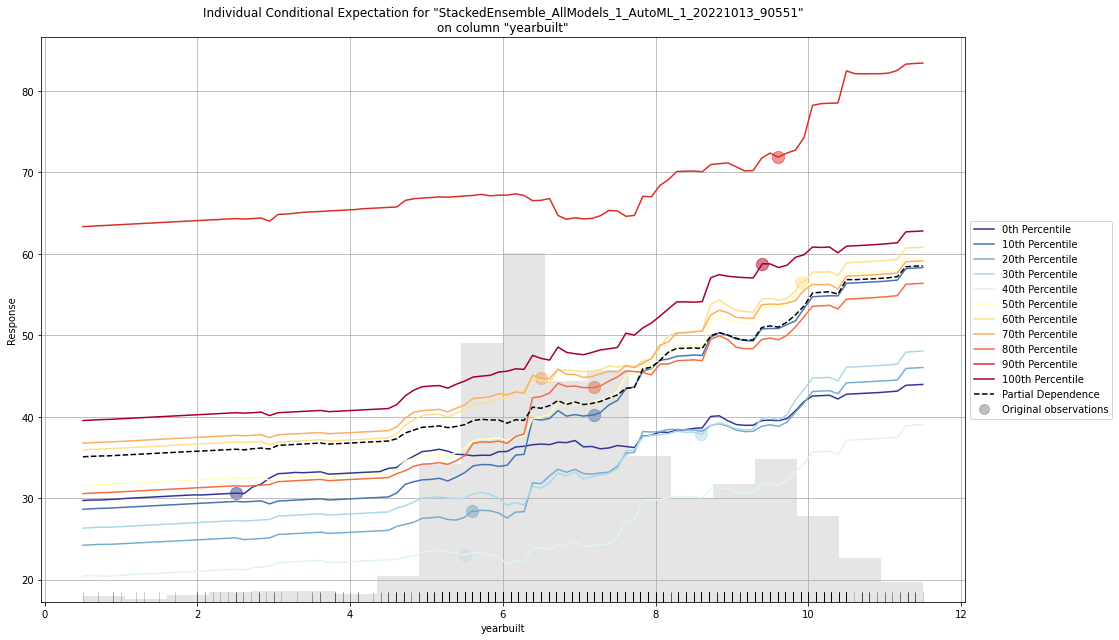

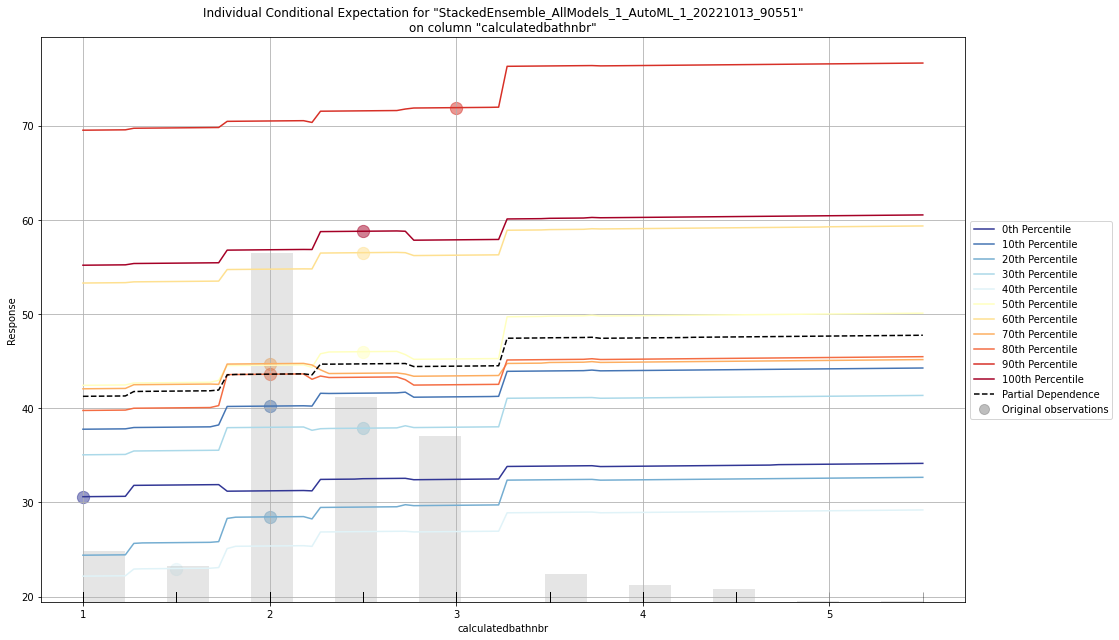

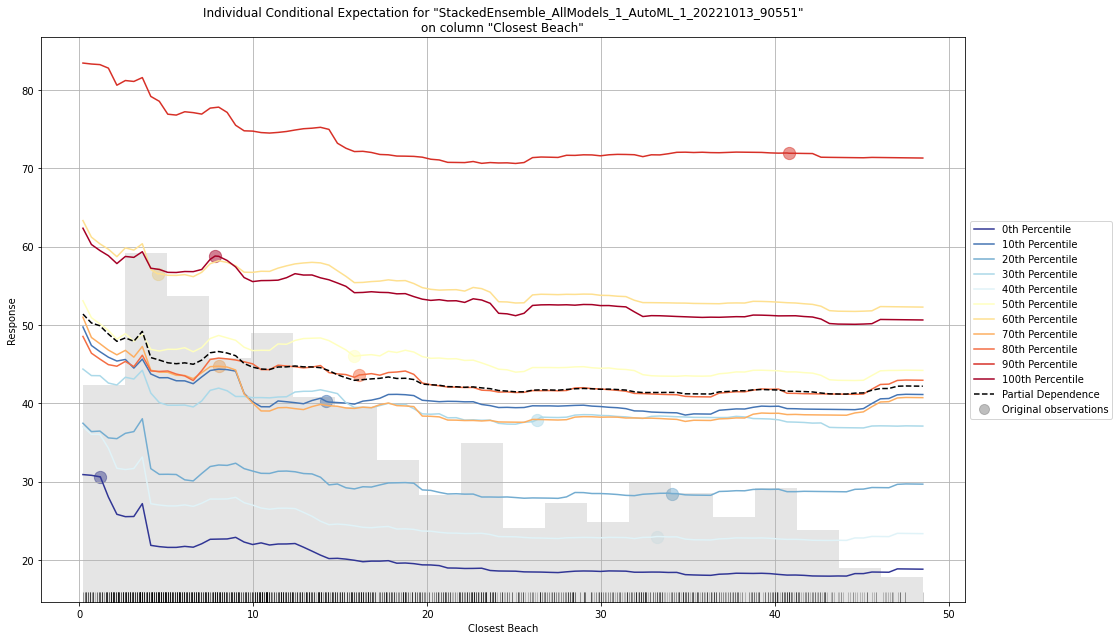

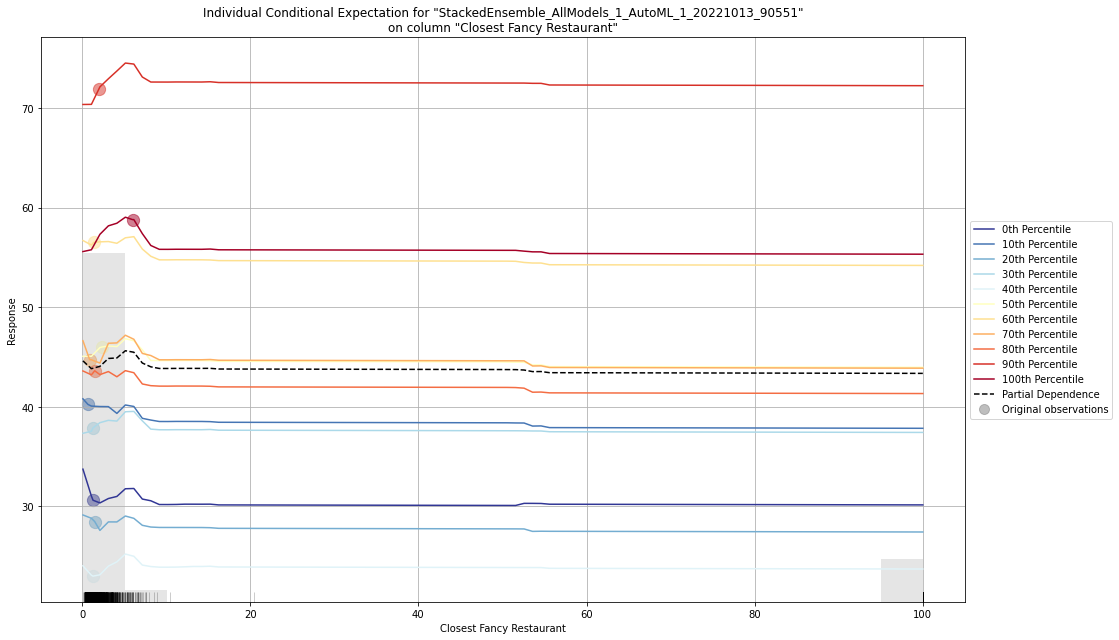

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20221013_90551_model_20,8.1835,66.9697,6.37071,0.33241,66.9697,175,0.006915,GBM
GBM_grid_1_AutoML_1_20221013_90551_model_15,8.63689,74.5959,6.76407,0.354963,74.5959,143,0.007102,GBM
DRF_1_AutoML_1_20221013_90551,8.74729,76.515,6.89198,0.333197,76.515,363,0.010131,DRF
GBM_grid_1_AutoML_1_20221013_90551_model_28,9.34737,87.3732,7.50217,0.380513,87.3732,120,0.00648,GBM
XRT_1_AutoML_1_20221013_90551,9.73857,94.8398,7.72542,0.357396,94.8398,481,0.010186,DRF
GBM_grid_1_AutoML_1_20221013_90551_model_25,14.0028,196.079,11.1314,0.486768,196.079,99,0.005521,GBM
GBM_grid_1_AutoML_1_20221013_90551_model_22,14.717,216.59,11.6604,0.498562,216.59,109,0.007861,GBM
GBM_4_AutoML_1_20221013_90551,15.3763,236.43,12.2779,0.515763,236.43,109,0.004445,GBM
GBM_grid_1_AutoML_1_20221013_90551_model_19,15.5426,241.573,12.4887,0.53303,241.573,66,0.003875,GBM
GBM_grid_1_AutoML_1_20221013_90551_model_5,15.774,248.82,12.5465,0.515006,248.82,120,0.004393,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [18]:
aml.explain(train_frame)

In [20]:
se = aml.leader
 
# Get the metalearner model of top model
metalearner = h2o.get_model(se.metalearner()['name'])
 
# list baselearner models :
metalearner.varimp()

C:\Users\RTiwari1\Anaconda3\envs\tf-gpu\lib\site-packages\h2o\estimators\stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


[('GBM_grid_1_AutoML_1_20221013_90551_model_32',
  4.861424446105957,
  1.0,
  0.28996127422858897),
 ('GBM_grid_1_AutoML_1_20221013_90551_model_2',
  4.399562835693359,
  0.9049945925247171,
  0.26241338521844965),
 ('GBM_1_AutoML_1_20221013_90551',
  2.3856468200683594,
  0.4907300003354538,
  0.14229269619946408),
 ('GLM_1_AutoML_1_20221013_90551',
  2.379991292953491,
  0.4895666526011496,
  0.14195537040805428),
 ('GBM_grid_1_AutoML_1_20221013_90551_model_4',
  0.8541916012763977,
  0.17570808941823884,
  0.05094854149998339),
 ('GBM_grid_1_AutoML_1_20221013_90551_model_16',
  0.8158609867095947,
  0.1678234426461377,
  0.0486622992751026),
 ('GBM_grid_1_AutoML_1_20221013_90551_model_19',
  0.6365150809288025,
  0.13093180568478371,
  0.037965153213409895),
 ('GBM_5_AutoML_1_20221013_90551',
  0.2257280796766281,
  0.04643249775432348,
  0.013463626214459732),
 ('GBM_grid_1_AutoML_1_20221013_90551_model_6',
  0.20684882998466492,
  0.042549016708539535,
  0.012337567101981646),
 (

In [31]:
model = h2o.get_model('GBM_grid_1_AutoML_1_20221013_90551_model_32')
model.model_performance(test_frame)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 442.9513711668198
RMSE: 21.04640993535049
MAE: 17.00203089745265
RMSLE: 0.6324507026065329
Mean Residual Deviance: 442.9513711668198

In [54]:
X_test_frame = h2o.H2OFrame(X_test)
predictions = model.predict(X_test_frame)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [55]:
list_predictions = h2o.as_list(predictions)
list_predictions

,predict
0,32.275463
1,38.371380
2,62.225519
3,62.590092
4,47.714237
...,...
459,25.156433
460,44.122278
461,25.086977
462,52.950812


In [56]:
testing['H20_pred'] = list_predictions
testing.to_excel('Testing_XGB_H20.xlsx')